In [36]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# import label encoder
from sklearn import preprocessing

# import classifier for KNN
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [37]:
helen = pd.read_csv('https://raw.githubusercontent.com/pbharrin/machinelearninginaction/master/Ch02/datingTestSet.txt', 
                    sep='\t', names = ['flyermile','gametime','icecream','result'],index_col = None)

In [38]:
helen.head()

,flyermile,gametime,icecream,result
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [78]:
# we need to encode 'result' using preporcessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
label = le.fit_transform(helen['result'])

In [95]:
print(label+50)

[51 52 50 50 50 50 51 51 50 51 50 50 52 50 50 50 50 50 52 51 52 50 52 51
 52 51 52 51 52 50 51 50 51 50 52 50 50 52 51 51 50 52 51 51 51 50 50 50
 50 52 52 50 51 52 52 52 52 51 50 52 50 52 52 52 52 52 51 52 51 50 52 51
 52 52 50 51 50 50 51 51 50 52 51 50 51 50 52 52 50 50 51 51 50 52 50 51
 51 52 50 50 51 50 52 51 51 52 51 51 50 52 51 52 50 51 50 52 50 50 52 51
 52 51 52 51 52 50 51 51 51 50 51 52 52 51 50 51 51 51 50 51 50 50 51 51
 52 51 51 50 52 51 52 52 51 51 51 50 52 52 50 50 51 52 51 51 50 52 50 51
 50 52 51 52 51 50 50 50 51 52 51 50 51 52 50 51 52 52 51 52 51 52 50 50
 51 50 51 52 52 52 51 52 52 50 52 52 51 50 51 51 52 50 50 50 52 50 51 51
 51 51 52 50 50 50 52 51 52 50 51 50 51 52 52 51 50 51 50 50 52 50 52 52
 50 51 50 51 52 51 50 52 51 50 50 50 50 52 51 52 52 51 50 52 50 50 50 51
 51 52 50 50 50 52 52 51 50 50 50 52 50 50 52 50 50 50 52 52 51 52 51 51
 51 51 50 52 51 50 50 50 51 50 51 52 52 50 51 50 51 52 52 50 52 52 51 50
 51 52 50 50 51 51 52 51 51 52 51 50 51 50 51 51 50

In [79]:
data = helen.loc[:,'flyermile':'icecream']

In [90]:
# Combine flyermiles, icecream, gametime into single list of tuples
features=list(zip(helen['flyermile'],helen['gametime'],helen['icecream']))
features[0]

(40920, 8.326976, 0.953952)

Text(0,0.5,'Ice Cream')

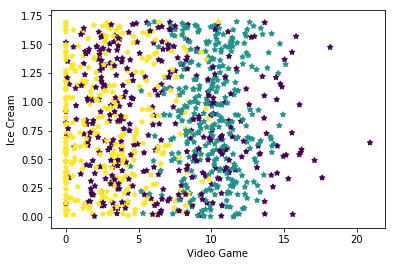

In [116]:
#plot the data first, have an idea of the data

ax = plt.figure().add_subplot(1,1,1)
#the following s and c could be the same is beacause label is using number to represent.
ax.scatter(data['gametime'],data['icecream'], s=30, c=10*label,marker=(5, 1))
plt.xlabel('Video Game')
plt.ylabel('Ice Cream')

In [118]:
#building the model

#create the kNN model object
model1 = KNeighborsClassifier(n_neighbors=3)

In [119]:
type(model1)

sklearn.neighbors.classification.KNeighborsClassifier

In [120]:
# Train the model using the training sets

#.fit() :Fit the model using X as training data and y as target values
model1.fit(features,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [121]:
#Predict Output

#.prdict(unknown):Predict the class labels for the provided data
predicted1= model1.predict([[8000,15,0.999]]) 
print(predicted1)

[2]


In [122]:
# Model for k = 20
model20 = KNeighborsClassifier(n_neighbors=20)
model20.fit(features,label)
predicted20= model20.predict([[8000,15,0.999]])
print(predicted20)

[2]


### Test the models

In [123]:
# first we need to split part of original dataset for testing
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3) # 70% training and 30% test

In [124]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



In [125]:
predicted20= model20.predict(X_test)
predicted1= model1.predict(X_test) 

In [126]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted1))

Accuracy: 0.8866666666666667


In [127]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted20))

Accuracy: 0.8133333333333334


### understand the preprocessing paackage in sklearn

In [2]:
ex = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)), columns=['a', 'b', 'c', 'd', 'e'])

In [3]:
ex.head()

,a,b,c,d,e
0,7,7,3,9,8
1,6,6,1,6,2
2,5,9,4,9,2
3,6,9,6,9,1
4,4,3,1,6,1


In [10]:
ex.loc[2,'b'] = 'NaN'
ex.loc[4,'d'] = 'NaN'
ex.loc[0,'e'] = 'NaN'

In [11]:
ex.head()

,a,b,c,d,e
0,7,7,3,9,NaN
1,6,6,1,6,2
2,5,NaN,4,9,2
3,6,9,6,9,1
4,4,3,1,NaN,1


In [19]:
# create the imputer first

imputer = preprocessing.Imputer(strategy = 'median',axis = 0)

In [20]:
print(imputer)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)


In [22]:
imputer.fit(ex)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [23]:
ex.head()

,a,b,c,d,e
0,7,7,3,9,NaN
1,6,6,1,6,2
2,5,NaN,4,9,2
3,6,9,6,9,1
4,4,3,1,NaN,1


In [24]:
imputer.transform(ex)

array([[7. , 7. , 3. , 9. , 1.5],
       [6. , 6. , 1. , 6. , 2. ],
       [5. , 6.5, 4. , 9. , 2. ],
       [6. , 9. , 6. , 9. , 1. ],
       [4. , 3. , 1. , 9. , 1. ]])

In [28]:
ex1 = ex.copy()

In [30]:
imputer1 = preprocessing.Imputer(strategy = 'median',axis = 0)

In [31]:
# 一定要先fit()才有東西可以transform
imputer1.transform(ex1)

NotFittedError: This Imputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.